In [38]:
#Spike Detection: Multiple recording: Note that filtdat.butter_data is a list.
pos_ind = [sp.spiker(5,0.03,j,filtdat.metadata[i]['time'],5000,-1) for i,j in enumerate(filtdat.butter_data)]
neg_ind = [sp.spiker(5,0.03,-1*j,filtdat.metadata[i]['time'],5000,-1) for i,j in enumerate(filtdat.butter_data)]

pos_spikes = [[i for i in enumerate(j) if i[1]] for j in pos_ind]
neg_spikes = [[i for i in enumerate(j) if i[1]] for j in neg_ind]
print 'Rec. \t+spike \t-spike'
for i in range(len(pos_ind)):
    print i, '\t',len(pos_spikes[i]), '\t', len(neg_spikes[i])

KeyError: 0

In [484]:
#Spike detection: Single recording, critical traces
crits = filtdat.metadata['Critical_traces']

pos_ind_crit = sp.spiker(5,0.05,filtdat.butter_data[crits],filtdat.metadata['time'],0,'end',range_list=filtdat.metadata['Range'])
neg_ind_crit = sp.spiker(5,0.05,-1*filtdat.butter_data[crits],filtdat.metadata['time'],0,'end',range_list=filtdat.metadata['Range'])

pos_spikes_crit = [i for i in enumerate(pos_ind_crit) if i[1]]
neg_spikes_crit = [i for i in enumerate(neg_ind_crit) if i[1]]
print '{0:d} electrodes have positive spikes, {1:d} electrodes have negative spikes'.format(len(pos_spikes_crit),len(neg_spikes_crit))

0 electrodes have positive spikes, 4 electrodes have negative spikes


In [483]:
#Spike detection: Single recording
pos_ind = sp.spiker(5,0.05,np.delete(filtdat.butter_data,filtdat.metadata['Critical_traces'],axis=0),filtdat.metadata['time'],DAC_fin+200,-500)
neg_ind = sp.spiker(5,0.05,-1*np.delete(filtdat.butter_data,filtdat.metadata['Critical_traces'],axis=0),filtdat.metadata['time'],DAC_fin+200,-500)

pos_spikes = [i for i in enumerate(pos_ind) if i[1]]
neg_spikes = [i for i in enumerate(neg_ind ) if i[1]]
print '{0:d} electrodes have positive spikes, {1:d} electrodes have negative spikes'.format(len(pos_spikes),len(neg_spikes))

12 electrodes have positive spikes, 27 electrodes have negative spikes


In [545]:
import os
import sys
sys.path.append('/home/user/Desktop/Thesis_Scripts/Modules')

from Tkinter import *
import Tkinter, Tkconstants, tkFileDialog
import Import_module as im
import Filtering_module as fm

import Spiker as sp

import numpy as np 
import sys
import time

import matplotlib
matplotlib.use('TkAgg') #Not case-sensitive
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.patches import Circle

In [538]:
#Let the user select a dataset and open the h5 file

root = Tk()
root.withdraw()#Remove the root window from the screen without removing it
path = tkFileDialog.askopenfilename(initialdir = "/home/user/Desktop/Data")
root.destroy()
print path

/home/user/Desktop/Data/2018-8-23/2639/Stim_17508/Trace_20180823_10_26_25_150mv.raw.h5


In [539]:
raw = im.import_rawdata(path,0,'end',modified=False)

In [540]:
filtdat_50 = fm.Filtering(raw)
filtdat_50.butter_filter(300,7000)
filtdat_50.discard_out_of_bounds()
raw=None

Discarded 5.0 traces.
74.0 critical traces.


In [498]:
filtdat_300 = fm.Filtering(raw)
filtdat_300.butter_filter(300,7000)
filtdat_300.discard_out_of_bounds()
raw=None

Discarded 5.0 traces.
131.0 critical traces.


In [501]:
filtdat_400 = fm.Filtering(raw)
filtdat_400.butter_filter(300,7000)
filtdat_400.discard_out_of_bounds()
raw=None

Discarded 4.0 traces.
164.0 critical traces.


In [ ]:
## Normal traces

In [541]:
DAC_fin =np.where(filtdat_50.metadata['DAC']>514)[0][-1]

In [542]:
#Spike detection: Single recording
neg_ind = sp.spiker(5,0.05,-1*np.delete(filtdat_50.butter_data,filtdat_50.metadata['Critical_traces'],axis=0),filtdat_50.metadata['time'],DAC_fin+200,-500)
neg_spikes_50 = [i for i in enumerate(neg_ind ) if i[1]]
print '{0:d} electrodes have negative spikes'.format(len(neg_spikes_50))

8 electrodes have negative spikes


In [502]:
DAC_fin =np.where(filtdat_300.metadata['DAC']>514)[0][-1]

In [503]:
#Spike detection: Single recording
neg_ind = sp.spiker(5,0.05,-1*np.delete(filtdat_300.butter_data,filtdat_300.metadata['Critical_traces'],axis=0),filtdat_300.metadata['time'],DAC_fin+200,-500)
neg_spikes_300 = [i for i in enumerate(neg_ind ) if i[1]]
print '{0:d} electrodes have negative spikes'.format(len(neg_spikes_300))

27 electrodes have negative spikes


In [504]:
DAC_fin =np.where(filtdat_400.metadata['DAC']>514)[0][-1]

In [506]:
#Spike detection: Single recording
neg_ind = sp.spiker(5,0.05,-1*np.delete(filtdat_400.butter_data,filtdat_400.metadata['Critical_traces'],axis=0),filtdat_400.metadata['time'],DAC_fin+200,-500)
neg_spikes_400 = [i for i in enumerate(neg_ind ) if i[1]]
print '{0:d} electrodes have negative spikes'.format(len(neg_spikes_400))

48 electrodes have negative spikes


In [ ]:
## Critical traces

In [543]:
#Spike detection: Single recording, critical traces
crits = filtdat_50.metadata['Critical_traces']

neg_ind_crit = sp.spiker(5,0.05,-1*filtdat_50.butter_data[crits],filtdat_50.metadata['time'],0,'end',range_list=filtdat_50.metadata['Range'])

neg_spikes_crit_50 = [i for i in enumerate(neg_ind_crit) if i[1]]
print '{0:d} electrodes have negative spikes'.format(len(neg_spikes_crit_50))

0 electrodes have negative spikes


In [507]:
#Spike detection: Single recording, critical traces
crits = filtdat_300.metadata['Critical_traces']

neg_ind_crit = sp.spiker(5,0.05,-1*filtdat_300.butter_data[crits],filtdat_300.metadata['time'],0,'end',range_list=filtdat_300.metadata['Range'])

neg_spikes_crit_300 = [i for i in enumerate(neg_ind_crit) if i[1]]
print '{0:d} electrodes have negative spikes'.format(len(neg_spikes_crit_300))

4 electrodes have negative spikes


In [508]:
#Spike detection: Single recording, critical traces
crits = filtdat_400.metadata['Critical_traces']

neg_ind_crit = sp.spiker(5,0.05,-1*filtdat_400.butter_data[crits],filtdat_400.metadata['time'],0,'end',range_list=filtdat_400.metadata['Range'])

neg_spikes_crit_400 = [i for i in enumerate(neg_ind_crit) if i[1]]
print '{0:d} electrodes have negative spikes'.format(len(neg_spikes_crit_400))

4 electrodes have negative spikes


In [ ]:
# Assemble image

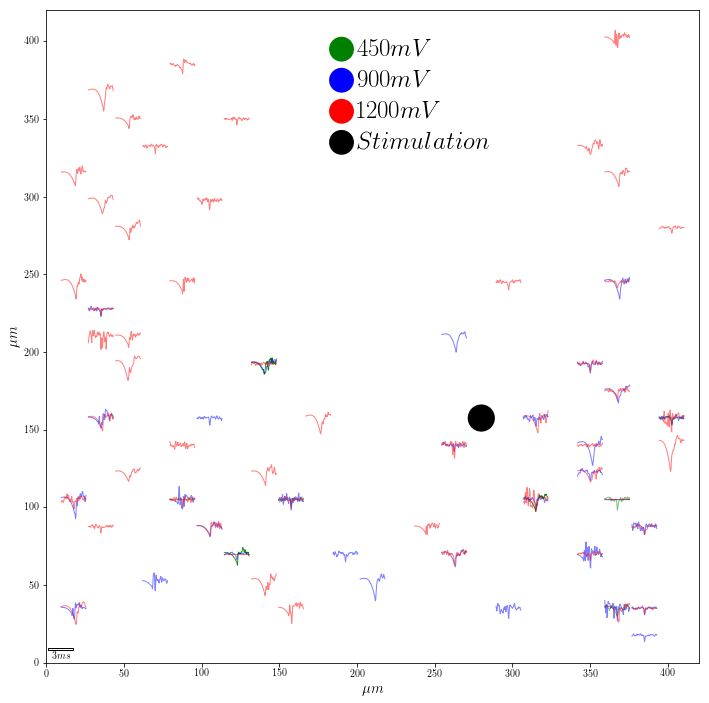

In [549]:
y_offset = (filtdat_300.metadata['y_clean'] - np.min(filtdat_300.metadata['y_clean']))+1
x_offset = (filtdat_300.metadata['x_clean']-np.min(filtdat_300.metadata['x_clean']))+1

newpath=('/').join(path.split('/')[:-1])

fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
ax.set_xlim(0,np.max(x_offset*17.5)+17.5)
ax.set_ylim(0,np.max(y_offset*17.5)+17.5)
ax.set_aspect('equal')
#ax.set_facecolor('k')
ax.set_ylabel(r'$\mu m$',fontsize=15)
ax.set_xlabel(r'$\mu m$',fontsize=15)
ax.tick_params(axis='both',labelsize=10)
extent_trace=8 #+size_square*17.5#if plotting all electrodes.

#---------------------------------------------------------------------#
#50mV
#normal traces
x_offset_clean = np.delete(x_offset,filtdat_50.metadata['Critical_traces'],axis=0)
y_offset_clean = np.delete(y_offset,filtdat_50.metadata['Critical_traces'],axis=0)
for ids,s in enumerate(neg_spikes_50):
    trace_stack = np.zeros([60])
    for i in s[1]:
        trace_stack = np.vstack((trace_stack, np.delete(filtdat_50.butter_data,filtdat_50.metadata['Critical_traces'],axis=0)\
                                 [s[0],i-30:i+30]))
    x_trace=np.linspace(-extent_trace,extent_trace,trace_stack.shape[1])
    if trace_stack.shape[0]>2:
        #std_trace = np.std(trace_stack[1:,:],axis=0)
        mean_trace = np.mean(trace_stack[1:,:],axis=0)
        #ax.fill_between(x_trace+x_offset_clean[ids]*17.5,y_offset_clean[ids]*17.5+mean_trace+2*std_trace,\
                        #y_offset_clean[ids]*17.5+mean_trace-std_trace,color='w',linewidth=0.1,alpha=0.6)
        ax.plot(x_trace+x_offset_clean[ids]*17.5,y_offset_clean[ids]*17.5+mean_trace,linewidth=1,color='g',alpha=0.5)
    else:
        ax.plot(x_trace+x_offset_clean[ids]*17.5,y_offset_clean[ids]*17.5+trace_stack[1,:],alpha=1,linewidth=0.8,color='g')

#Crit traces
x_offset_crit = x_offset[filtdat_50.metadata['Critical_traces']]
y_offset_crit = y_offset[filtdat_50.metadata['Critical_traces']]        
for ids,s in enumerate(neg_spikes_crit_50):
    trace_stack = np.zeros([60])
    for i in s[1]:
        trace_stack = np.vstack((trace_stack, filtdat_50.butter_data[filtdat.metadata['Critical_traces']]\
                                 [s[0],i-30:i+30]))

    x_trace=np.linspace(-extent_trace,extent_trace,trace_stack.shape[1])
    if trace_stack.shape[0]>2:
        #std_trace = np.std(trace_stack[1:,:],axis=0)
        mean_trace = np.mean(trace_stack[1:,:],axis=0)
        #ax.fill_between(x_trace+x_offset_crit[ids]*17.5,y_offset_crit[ids]*17.5+mean_trace+2*std_trace,\
                        #y_offset_crit[ids]*17.5+mean_trace-std_trace,color='w',linewidth=0.1,alpha=0.6)
        ax.plot(x_trace+x_offset_crit[ids]*17.5,y_offset_crit[ids]*17.5+mean_trace,linewidth=1,color='g',alpha=0.5)
    else:
        ax.plot(x_trace+x_offset_crit[ids]*17.5,y_offset_crit[ids]*17.5+trace_stack[1,:],linewidth=1,color='g',alpha=0.5)
        
#---------------------------------------------------------------------#
#300mV
#normal traces
x_offset_clean = np.delete(x_offset,filtdat_300.metadata['Critical_traces'],axis=0)
y_offset_clean = np.delete(y_offset,filtdat_300.metadata['Critical_traces'],axis=0)
for ids,s in enumerate(neg_spikes_300):
    trace_stack = np.zeros([60])
    for i in s[1]:
        trace_stack = np.vstack((trace_stack, np.delete(filtdat_300.butter_data,filtdat_300.metadata['Critical_traces'],axis=0)\
                                 [s[0],i-30:i+30]))
    x_trace=np.linspace(-extent_trace,extent_trace,trace_stack.shape[1])
    if trace_stack.shape[0]>2:
        #std_trace = np.std(trace_stack[1:,:],axis=0)
        mean_trace = np.mean(trace_stack[1:,:],axis=0)
        #ax.fill_between(x_trace+x_offset_clean[ids]*17.5,y_offset_clean[ids]*17.5+mean_trace+2*std_trace,\
                        #y_offset_clean[ids]*17.5+mean_trace-std_trace,color='w',linewidth=0.1,alpha=0.6)
        ax.plot(x_trace+x_offset_clean[ids]*17.5,y_offset_clean[ids]*17.5+mean_trace,linewidth=1,color='b',alpha=0.5)
    else:
        ax.plot(x_trace+x_offset_clean[ids]*17.5,y_offset_clean[ids]*17.5+trace_stack[1,:],alpha=0.5,linewidth=1,color='b')

#Crit traces
x_offset_crit = x_offset[filtdat_300.metadata['Critical_traces']]
y_offset_crit = y_offset[filtdat_300.metadata['Critical_traces']]        
for ids,s in enumerate(neg_spikes_crit_300):
    trace_stack = np.zeros([60])
    for i in s[1]:
        trace_stack = np.vstack((trace_stack, filtdat_300.butter_data[filtdat.metadata['Critical_traces']]\
                                 [s[0],i-30:i+30]))

    x_trace=np.linspace(-extent_trace,extent_trace,trace_stack.shape[1])
    if trace_stack.shape[0]>2:
        #std_trace = np.std(trace_stack[1:,:],axis=0)
        mean_trace = np.mean(trace_stack[1:,:],axis=0)
        #ax.fill_between(x_trace+x_offset_crit[ids]*17.5,y_offset_crit[ids]*17.5+mean_trace+2*std_trace,\
                        #y_offset_crit[ids]*17.5+mean_trace-std_trace,color='w',linewidth=0.1,alpha=0.6)
        ax.plot(x_trace+x_offset_crit[ids]*17.5,y_offset_crit[ids]*17.5+mean_trace,linewidth=1,color='b',alpha=0.5)
    else:
        ax.plot(x_trace+x_offset_crit[ids]*17.5,y_offset_crit[ids]*17.5+trace_stack[1,:],linewidth=1,color='b',alpha=0.5)
        
#------------------------------------------------------------------#
#400mv
#normal traces
x_offset_clean = np.delete(x_offset,filtdat_400.metadata['Critical_traces'],axis=0)
y_offset_clean = np.delete(y_offset,filtdat_400.metadata['Critical_traces'],axis=0)
for ids,s in enumerate(neg_spikes_400):
    trace_stack = np.zeros([60])
    for i in s[1]:
        trace_stack = np.vstack((trace_stack, np.delete(filtdat_400.butter_data,filtdat_400.metadata['Critical_traces'],axis=0)\
                                 [s[0],i-30:i+30]))
    x_trace=np.linspace(-extent_trace,extent_trace,trace_stack.shape[1])
    if trace_stack.shape[0]>2:
        #std_trace = np.std(trace_stack[1:,:],axis=0)
        mean_trace = np.mean(trace_stack[1:,:],axis=0)
        #ax.fill_between(x_trace+x_offset_clean[ids]*17.5,y_offset_clean[ids]*17.5+mean_trace+2*std_trace,\
                        #y_offset_clean[ids]*17.5+mean_trace-std_trace,color='w',linewidth=0.1,alpha=0.6)
        ax.plot(x_trace+x_offset_clean[ids]*17.5,y_offset_clean[ids]*17.5+mean_trace,linewidth=1,color='r',alpha=0.5)
    else:
        ax.plot(x_trace+x_offset_clean[ids]*17.5,y_offset_clean[ids]*17.5+trace_stack[1,:],alpha=0.5,linewidth=1,color='r')

#Crit traces
x_offset_crit = x_offset[filtdat_400.metadata['Critical_traces']]
y_offset_crit = y_offset[filtdat_400.metadata['Critical_traces']]        
for ids,s in enumerate(neg_spikes_crit_400):
    trace_stack = np.zeros([60])
    for i in s[1]:
        trace_stack = np.vstack((trace_stack, filtdat.butter_data[filtdat_400.metadata['Critical_traces']]\
                                 [s[0],i-30:i+30]))

    x_trace=np.linspace(-extent_trace,extent_trace,trace_stack.shape[1])
    if trace_stack.shape[0]>2:
        #std_trace = np.std(trace_stack[1:,:],axis=0)
        mean_trace = np.mean(trace_stack[1:,:],axis=0)
        #ax.fill_between(x_trace+x_offset_crit[ids]*17.5,y_offset_crit[ids]*17.5+mean_trace+2*std_trace,\
                        #y_offset_crit[ids]*17.5+mean_trace-std_trace,color='w',linewidth=0.1,alpha=0.6)
        ax.plot(x_trace+x_offset_crit[ids]*17.5,y_offset_crit[ids]*17.5+mean_trace,linewidth=1,color='r',alpha=0.5)
    else:
        ax.plot(x_trace+x_offset_crit[ids]*17.5,y_offset_crit[ids]*17.5+trace_stack[1,:],linewidth=1,color='r',alpha=0.5)

        
stim_ind = np.where(filtdat.metadata['clean_abs_inds']==17508)[0][0]
#rect = Rectangle((x_offset[stim_ind]*17.5-0.5*17.5,y_offset[stim_ind]*17.5-0.5*17.5), 17.5,17.5,fc='black')
rect = Circle((x_offset[stim_ind]*17.5,y_offset[stim_ind]*17.5), 17.5/2,fc='black')
ax.add_patch(rect)

#Legend
ax.text(200,390,r'$450mV$',color='k',fontsize=25)
ax.text(200,370,r'$900mV$',color='k',fontsize=25)
ax.text(200,350,r'$1200mV$',color='k',fontsize=25)
ax.text(200,330,r'$Stimulation$',color='k',fontsize=25)
circ_1 = Circle((190, 395), 8, fc='g')
circ_2 = Circle((190, 375), 8, fc='b')
circ_3 = Circle((190, 355), 8, fc='r')
circ_4 = Circle((190, 335), 8, fc='k')
ax.add_patch(circ_1)
ax.add_patch(circ_2)
ax.add_patch(circ_3)
ax.add_patch(circ_4)

bar = AnchoredSizeBar(ax.transData,16,r'$3 ms$',3,color='black',frameon=False,size_vertical=1)
ax.add_artist(bar)
plt.savefig(newpath+'/neg_thresh.png',dpi=400,bbox_inches='tight',pad_inches=0)

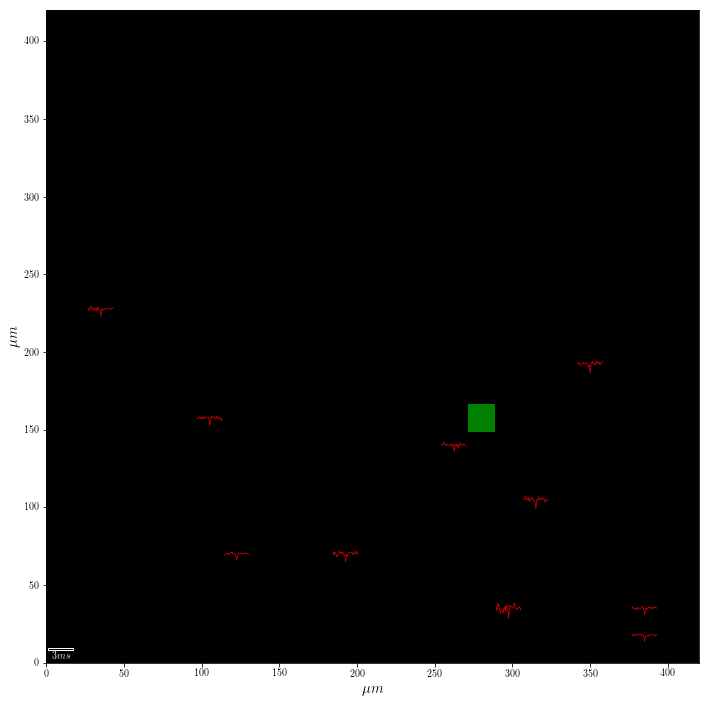

In [490]:
y_offset = (filtdat.metadata['y_clean'] - np.min(filtdat.metadata['y_clean']))+1
x_offset = (filtdat.metadata['x_clean']-np.min(filtdat.metadata['x_clean']))+1

newpath=('/').join(path.split('/')[:-1])

fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
ax.set_xlim(0,np.max(x_offset*17.5)+17.5)
ax.set_ylim(0,np.max(y_offset*17.5)+17.5)
ax.set_aspect('equal')
ax.set_facecolor('k')
ax.set_ylabel(r'$\mu m$',fontsize=15)
ax.set_xlabel(r'$\mu m$',fontsize=15)
ax.tick_params(axis='both',labelsize=10)
extent_trace=8 #+size_square*17.5#if plotting all electrodes.

#normal traces
x_offset_clean = np.delete(x_offset,filtdat.metadata['Critical_traces'],axis=0)
y_offset_clean = np.delete(y_offset,filtdat.metadata['Critical_traces'],axis=0)
for ids,s in enumerate(neg_spikes):
    trace_stack = np.zeros([60])
    for i in s[1]:
        trace_stack = np.vstack((trace_stack, np.delete(filtdat.butter_data,filtdat.metadata['Critical_traces'],axis=0)\
                                 [s[0],i-30:i+30]))
    x_trace=np.linspace(-extent_trace,extent_trace,trace_stack.shape[1])
    if trace_stack.shape[0]>2:
        #std_trace = np.std(trace_stack[1:,:],axis=0)
        mean_trace = np.mean(trace_stack[1:,:],axis=0)
        #ax.fill_between(x_trace+x_offset_clean[ids]*17.5,y_offset_clean[ids]*17.5+mean_trace+2*std_trace,\
                        #y_offset_clean[ids]*17.5+mean_trace-std_trace,color='w',linewidth=0.1,alpha=0.6)
        ax.plot(x_trace+x_offset_clean[ids]*17.5,y_offset_clean[ids]*17.5+mean_trace,linewidth=0.6,color='r')
    else:
        pass
        #ax.plot(x_trace+x_offset_clean[ids]*17.5,y_offset_clean[ids]*17.5+trace_stack[1,:],alpha=0.4,linewidth=0.3,color='r')

#Crit traces
x_offset_crit = x_offset[filtdat.metadata['Critical_traces']]
y_offset_crit = y_offset[filtdat.metadata['Critical_traces']]        
for ids,s in enumerate(neg_spikes_crit):
    trace_stack = np.zeros([60])
    for i in s[1]:
        trace_stack = np.vstack((trace_stack, filtdat.butter_data[filtdat.metadata['Critical_traces']]\
                                 [s[0],i-30:i+30]))

    x_trace=np.linspace(-extent_trace,extent_trace,trace_stack.shape[1])
    if trace_stack.shape[0]>2:
        #std_trace = np.std(trace_stack[1:,:],axis=0)
        mean_trace = np.mean(trace_stack[1:,:],axis=0)
        #ax.fill_between(x_trace+x_offset_crit[ids]*17.5,y_offset_crit[ids]*17.5+mean_trace+2*std_trace,\
                        #y_offset_crit[ids]*17.5+mean_trace-std_trace,color='w',linewidth=0.1,alpha=0.6)
        ax.plot(x_trace+x_offset_crit[ids]*17.5,y_offset_crit[ids]*17.5+mean_trace,linewidth=0.6,color='r')
    else:
        pass
        #ax.plot(x_trace+x_offset_crit[ids]*17.5,y_offset_crit[ids]*17.5+trace_stack[1,:],linewidth=0.4,color='r')

        
stim_ind = np.where(filtdat.metadata['clean_abs_inds']==17508)[0][0]
rect = Rectangle((x_offset[stim_ind]*17.5-0.5*17.5,y_offset[stim_ind]*17.5-0.5*17.5), 17.5,17.5,fc='green')
ax.add_patch(rect)
bar = AnchoredSizeBar(ax.transData,16,r'$3 ms$',3,color='white',frameon=False,size_vertical=1)
ax.add_artist(bar)
plt.savefig(newpath+'/neg_thresh.png',dpi=300,bbox_inches='tight',pad_inches=0)

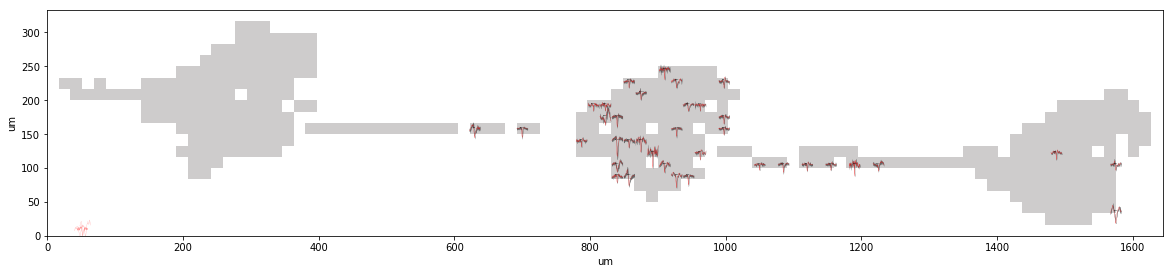

In [97]:
x_offset = (filtdat.metadata['y_clean'] - np.min(filtdat.metadata['y_clean']))+1
y_offset = (filtdat.metadata['x_clean']-np.min(filtdat.metadata['x_clean']))+1

newpath=('/').join(path.split('/')[:-1])

densplot = np.zeros([np.max(x_offset)+2,np.max(y_offset)+2])
background = np.ones([np.max(x_offset)+2,np.max(y_offset)+2])
background[x_offset,y_offset]=0

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)
ax.set_xlim(0,np.max(x_offset*17.5)+17.5)
ax.set_ylim(0,np.max(y_offset*17.5)+17.5)
ax.set_aspect('equal')
ax.set_xlabel('um')
ax.set_ylabel('um')

extent_trace=8 #+size_square*17.5#if plotting all electrodes. 


for ids,s in enumerate(neg_spikes):
    #if ids>25:
    #    break
    #x_offset=x_el_map[ids]*17.5
    #y_offset=y_el_map[ids]*17.5
    trace_stack = np.zeros([60])
    #print filtdat.butter_data[s[0],i-30:i+30].shape
    for i in s[1]:
        trace_stack = np.vstack((trace_stack, filtdat.butter_data[s[0],i-30:i+30]))
        
    densplot[x_offset[ids],y_offset[ids]] = len(s[1])
    
    x_trace=np.linspace(-extent_trace,extent_trace,trace_stack.shape[1])
    if trace_stack.shape[0]>2:
        std_trace = np.std(trace_stack[1:,:],axis=0)
        mean_trace = np.mean(trace_stack[1:,:],axis=0)
        ax.fill_between(x_trace+x_offset[ids]*17.5,y_offset[ids]*17.5+2*mean_trace+2*std_trace,y_offset[ids]*17.5+2*mean_trace-2*std_trace,color='k',linewidth=0.1,alpha=0.5)
        ax.plot(x_trace+x_offset[ids]*17.5,y_offset[ids]*17.5+2*mean_trace,linewidth=0.2,color='r')
        ax.text(x_offset[ids]*17.5-3,y_offset[ids]*17.5+3,str(len(s[1]))+'/'+str(ids),fontsize=2)
    else:
        ax.plot(x_trace+x_offset[ids],y_offset[ids]+2*trace_stack[1,:],alpha=0.3,linewidth=0.3,color='r')

    #for i in s[1]:
        #curve=10*filtdat.butter_data[s[0],i-30:i+30]
        #len_curve=len(curve)
        #x_trace=np.linspace(-extent_trace,extent_trace,len_curve)
        #ax.plot(x_trace+x_offset,y_offset+2*filtdat.butter_data[s[0],i-30:i+30],alpha=0.3,linewidth=0.3,color='k')

ax.imshow(np.flipud(background.T),cmap = 'hot',zorder=0,extent=[0,np.max(x_offset*17.5)+17.5,0,np.max(y_offset*17.5)+17.5],interpolation='none',alpha=0.2)
#ax.imshow(np.flipud(densplot.T),cmap = 'Blues',zorder=0,extent=[0,np.max(x_offset*17.5)+17.5,0,np.max(y_offset*17.5)+17.5],vmax=np.std(densplot)*3,interpolation='bilinear',alpha=0.5)
plt.savefig(newpath+'/conf_'+path.split('/')[-1][-8]+'_neg.png',dpi=400,bbox_inches='tight',pad_inches=0)

### Square Routing

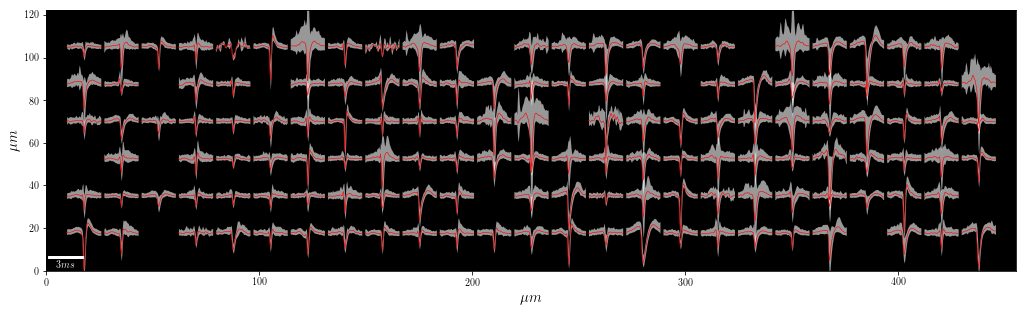

In [90]:
y_offset = (filtdat.metadata['y_clean'] - np.min(filtdat.metadata['y_clean']))+1
x_offset = (filtdat.metadata['x_clean']-np.min(filtdat.metadata['x_clean']))+1

newpath=('/').join(path.split('/')[:-1])

fig=plt.figure(figsize=(18,4.8))
ax=fig.add_subplot(111)
ax.set_xlim(0,np.max(x_offset*17.5)+17.5)
ax.set_ylim(0,np.max(y_offset*17.5)+17.5)
ax.set_aspect('equal')
ax.set_facecolor('k')
ax.set_ylabel(r'$\mu m$',fontsize=15)
ax.set_xlabel(r'$\mu m$',fontsize=15)
ax.tick_params(axis='both',labelsize=10)
extent_trace=8 #+size_square*17.5#if plotting all electrodes. 


for ids,s in enumerate(neg_spikes):
    trace_stack = np.zeros([60])
    for i in s[1]:
        trace_stack = np.vstack((trace_stack, filtdat.butter_data[s[0],i-30:i+30]))

    x_trace=np.linspace(-extent_trace,extent_trace,trace_stack.shape[1])
    if trace_stack.shape[0]>2:
        std_trace = np.std(trace_stack[1:,:],axis=0)
        mean_trace = np.mean(trace_stack[1:,:],axis=0)
        ax.fill_between(x_trace+x_offset[ids]*17.5,y_offset[ids]*17.5+mean_trace+2*std_trace,\
                        y_offset[ids]*17.5+mean_trace-std_trace,color='w',linewidth=0.1,alpha=0.6)
        ax.plot(x_trace+x_offset[ids]*17.5,y_offset[ids]*17.5+mean_trace,linewidth=0.6,color='r')
        #ax.text(x_offset[ids]*17.5-3,y_offset[ids]*17.5+3,str(len(s[1]))+'/'+str(ids),fontsize=2)
    else:
        ax.plot(x_trace+x_offset[ids],y_offset[ids]+trace_stack[1,:],alpha=0.3,linewidth=0.3,color='r')
        print 'single'

bar = AnchoredSizeBar(ax.transData,
                           16, r'$3 ms$', 'lower left', 
                           pad=0.1,
                           color='white',
                           frameon=False,
                           size_vertical=1)
ax.add_artist(bar)
plt.savefig(newpath+'/conf_mean_neg_hor.png',dpi=400,bbox_inches='tight',pad_inches=0)

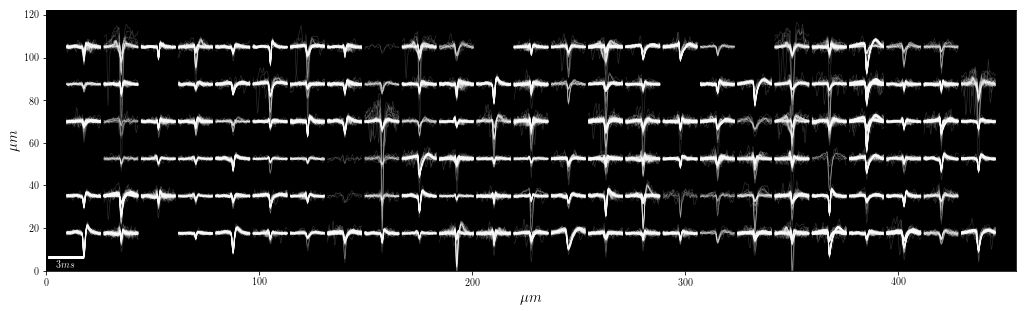

In [13]:
y_offset = (filtdat.metadata['y_clean'] - np.min(filtdat.metadata['y_clean']))+1
x_offset = (filtdat.metadata['x_clean']-np.min(filtdat.metadata['x_clean']))+1

newpath=('/').join(path.split('/')[:-1])

fig=plt.figure(figsize=(18,4.8))
ax=fig.add_subplot(111)
ax.set_xlim(0,np.max(x_offset*17.5)+17.5)
ax.set_ylim(0,np.max(y_offset*17.5)+17.5)
ax.set_aspect('equal')
ax.set_facecolor('k')
ax.set_ylabel(r'$\mu m$',fontsize=15)
ax.set_xlabel(r'$\mu m$',fontsize=15)
ax.tick_params(axis='both',labelsize=10)

extent_trace=8 #on figure
bin_size = 60
x_trace=np.linspace(-extent_trace,extent_trace,bin_size)

for ids,s in enumerate(neg_spikes):
    for i in s[1]: #iterate over all detected spikes and plot them
        ax.plot(x_trace+x_offset[ids]*17.5,y_offset[ids]*17.5+0.5*filtdat.butter_data[s[0],i-bin_size/2:i+bin_size/2],\
        linewidth=0.6,color='w',alpha=0.2)

        
bar = AnchoredSizeBar(ax.transData,
                           16, r'$3 ms$', 'lower left', 
                           pad=0.1,
                           color='white',
                           frameon=False,
                           size_vertical=1)
ax.add_artist(bar)

plt.savefig(newpath+'/conf_neg_hor.png',dpi=400,bbox_inches='tight',pad_inches=0)